# Análise de dados - Inferência Estatística

O objetivo desta atividade é re-utilizar os dados de uma avaliação educacional federal e fazer algumas inferências sobre como as variáveis de estudo se comportam


O objetivo desta atividade é levantar alguma hipóteses sobre os dados e sugestões de intervenções. 
No campo de políticas públicas, é sempre importante que as decisões sejam baseadas em dados (e não em achismos). Assim é importante saber:
-  O 6º ano e o 8º ano não reprovam, logo notas_6 e notas_8 devem estar o mais próximo possível de 1,0 (100%);
-  O As médias das notas de Língua Portuguesa e Matemática quanto maior melhor; 
- Existe uma fórmula matemática que relaciona o Indicador de notasimento, a Nota Padronizada e o IDEB;
- Os governos federal e distrital utilizam-se do IDEB para distribuir dinheiro para as escolas;
- No ano de 2021, que são as referências para estes dados, não houve reprovação por conta da pandemia de Covid 19.

Assim, utilizando novamente os dados de SAEB, vocês devem:
1) Análise a presença de outliers no redimento (aprovação) de cada um dos anos e das notas de Língua Portuguesa, Matemática e IDEB (faça o boxplot de cada uma dessas variáveis). Os dados estão bem distribuídos (utilize as técnicas que acharem mais viáveis para fazer esta análise);
2) Calcule a covariância das seguintes variáveis (variância conjunta): aprovação média e indicador de notasimento, indicador de notasimento e nota padronizada, nota padronizada e IDEB, indicador de notasimento e IDEB.
3) Faça gráficos de dispersão das informações acima. É possível identificar algum padrão?
4) Calcule a correlação dos itens pedidos em (2). Explique os resultados obtidos, partindo da definição de correlação. 
5) Calcule o índice chamado R quadrado para os itens calculados em (4). Qual o significado dos resultados obtidos?
6) Há algum relação entre os resultados obtidos nos itens  (2) e (4).
7) O que é possível inferir de todas as análises realizadas nos itens de (1) a (4).

In [58]:
# 1. Análise a presença de outliers no redimento (aprovação) de cada um dos anos e das notas de Língua Portuguesa, Matemática e IDEB 
# (faça o boxplot de cada uma dessas variáveis). Os dados estão bem distribuídos (utilize as técnicas que acharem mais viáveis 
# para fazer esta análise);

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dados = pd.read_csv("DadosIDEB.csv")
dados.head()

,UF,Municipio,Cod_Escola,Rede,Ap_Media,Rend_6,Rend_7,Rend_8,Rend_9,Indicador_de_rendimento,Nota_SAEB_Mat,Nota_SAEB_LP,Nota_Padronizada,IDEB
0,DF,Brasilia,53009380,Estadual,87.9,100.0,87.2,88.9,73.5,0.863522,226.82,239.87,4.444833,3.8
1,DF,Brasilia,53011589,Estadual,83.4,95.6,72.3,81.3,84.1,0.825044,239.28,240.48,4.662667,3.8
2,DF,Brasilia,53010019,Estadual,86.5,NaN,NaN,100.0,83.3,0.908893,231.85,223.94,4.263167,3.9
3,DF,Brasilia,53009665,Estadual,86.8,100.0,84.3,87.2,75.0,0.857199,240.40,244.53,4.748833,4.1
4,DF,Brasilia,53006720,Estadual,94.6,100.0,82.1,100.0,94.9,0.936381,235.71,238.84,4.575833,4.3


In [4]:
dados.describe()

,Cod_Escola,Ap_Media,Rend_6,Rend_7,Rend_8,Rend_9,Indicador_de_rendimento,Nota_SAEB_Mat,Nota_SAEB_LP,Nota_Padronizada,IDEB
count,1.030000e+02,103.000000,100.00000,102.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,5.300990e+07,95.572816,98.72100,92.477451,97.943689,93.585437,0.954298,254.059709,255.911165,5.166181,4.931068
std,1.156610e+04,3.633698,2.08236,6.942521,3.301475,6.164373,0.038126,10.827693,11.980423,0.366607,0.440594
min,5.300085e+07,83.400000,90.80000,69.000000,81.300000,71.400000,0.825044,226.820000,223.940000,4.263167,3.800000
25%,5.300469e+07,93.750000,98.27500,88.625000,97.000000,90.950000,0.936751,247.195000,246.165000,4.910916,4.600000
50%,5.300792e+07,96.400000,100.00000,94.250000,99.400000,95.500000,0.962210,252.920000,256.160000,5.141167,5.000000
75%,5.301105e+07,98.350000,100.00000,97.850000,100.000000,98.000000,0.983154,261.290000,265.045000,5.446333,5.300000
max,5.306821e+07,100.000000,100.00000,100.000000,100.000000,100.000000,1.000000,279.250000,284.890000,6.069000,5.800000


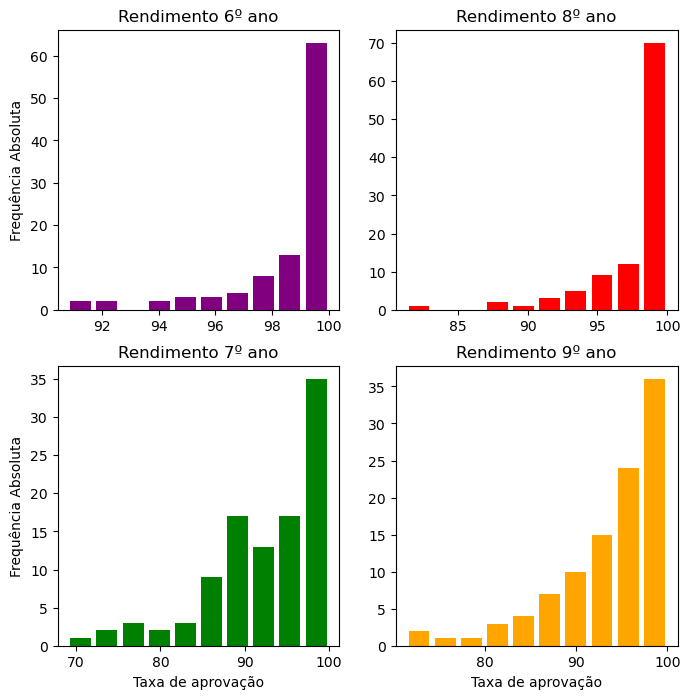

In [55]:
dados = pd.read_csv('DadosIDEB.csv')
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

Rend_6 = dados['Rend_6'].dropna()
Rend_7 = dados['Rend_7'].dropna()
Rend_8 = dados['Rend_8'].dropna()
Rend_9 = dados['Rend_9'].dropna()

# Gráfico para o 6º ano
Rend_6 = dados['Rend_6']
axs[0, 0].hist(Rend_6, bins=10, rwidth=0.8, color="purple")
axs[0, 0].set_title('Rendimento 6º ano')
axs[0, 0].set_ylabel('Frequência Absoluta')

# Gráfico para o 7º ano
Rend_7 = dados['Rend_7']
axs[1, 0].hist(Rend_7, bins=10, rwidth=0.8, color="green")
axs[1, 0].set_title('Rendimento 7º ano')
axs[1, 0].set_ylabel('Frequência Absoluta')
axs[1, 0].set_xlabel('Taxa de aprovação')

# Gráfico para o 8º ano
Rend_8 = dados['Rend_8']
axs[0, 1].hist(Rend_8, bins=10, rwidth=0.8, color="red")
axs[0, 1].set_title('Rendimento 8º ano')

# Gráfico para o 9º ano
Rend_9 = dados['Rend_9']
axs[1, 1].hist(Rend_9, bins=10, rwidth=0.8, color="orange")
axs[1, 1].set_title('Rendimento 9º ano')
axs[1, 1].set_xlabel('Taxa de aprovação')

plt.show()

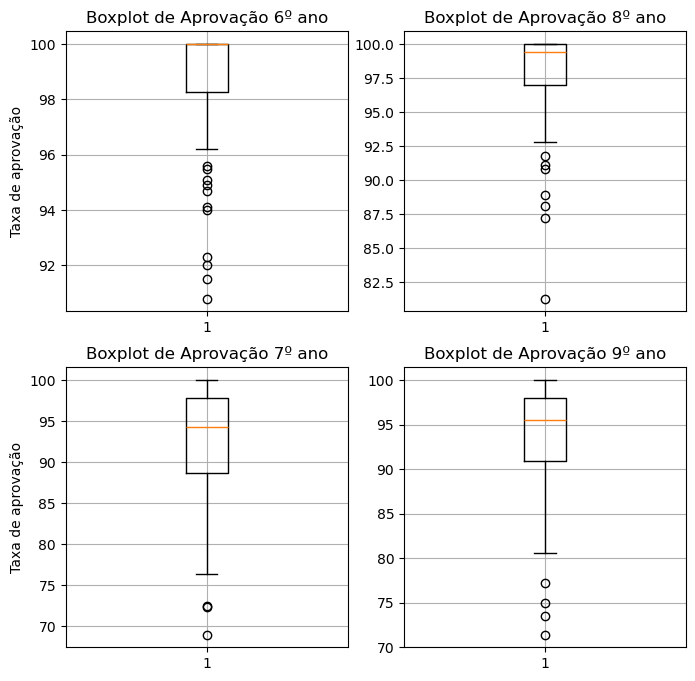

In [52]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

Rend_6 = dados['Rend_6'].dropna()
Rend_7 = dados['Rend_7'].dropna()
Rend_8 = dados['Rend_8'].dropna()
Rend_9 = dados['Rend_9'].dropna()

# Boxplot para o 6º ano
axs[0, 0].boxplot(Rend_6)
axs[0, 0].set_ylabel('Taxa de aprovação')
axs[0, 0].set_title('Boxplot de Aprovação 6º ano')
axs[0, 0].grid(True)

# Boxplot para o 7º ano
axs[1, 0].boxplot(Rend_7)
axs[1, 0].set_title('Boxplot de Aprovação 7º ano')
axs[1, 0].set_ylabel('Taxa de aprovação')
axs[1, 0].grid(True)

# Boxplot para o 8º ano
axs[0, 1].boxplot(Rend_8)
axs[0, 1].set_title('Boxplot de Aprovação 8º ano')
axs[0, 1].grid(True)

# Boxplot para o 9º ano
axs[1, 1].boxplot(Rend_9)
axs[1, 1].set_title('Boxplot de Aprovação 9º ano')
axs[1, 1].grid(True)

plt.show()

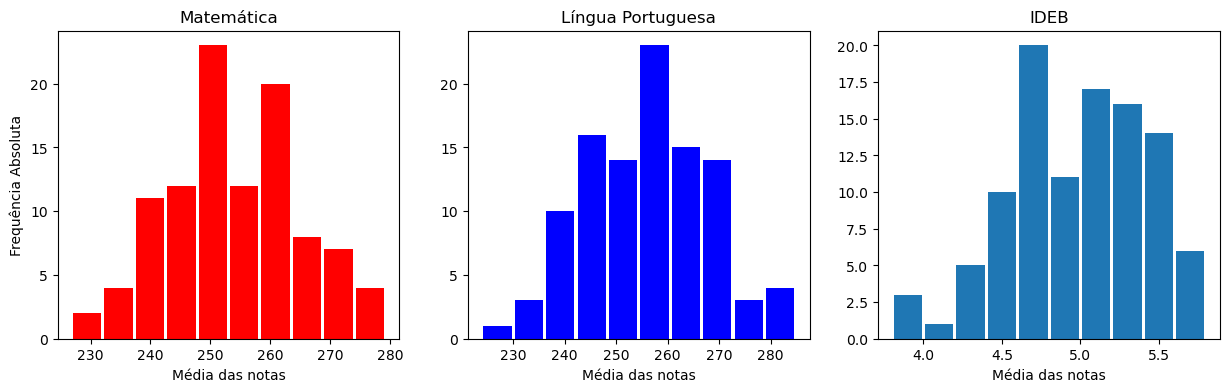

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Gráfico para a média de matemática
NotaMat = dados['Nota_SAEB_Mat']
axs[0].hist(NotaMat, bins=10, rwidth=0.9, color="red")
axs[0].set_title('Matemática')
axs[0].set_ylabel('Frequência Absoluta')
axs[0].set_xlabel('Média das notas')

# Gráfico para a média de português
NotaPt = dados['Nota_SAEB_LP']
axs[1].hist(NotaPt, bins=10, rwidth=0.9, color="blue")
axs[1].set_title('Língua Portuguesa')
axs[1].set_xlabel('Média das notas')

# Gráfico para a nota IDEB
NotaIDEB = dados['IDEB']
axs[2].hist(NotaIDEB, bins=10, rwidth=0.9)
axs[2].set_title('IDEB')
axs[2].set_xlabel('Média das notas')

plt.show()

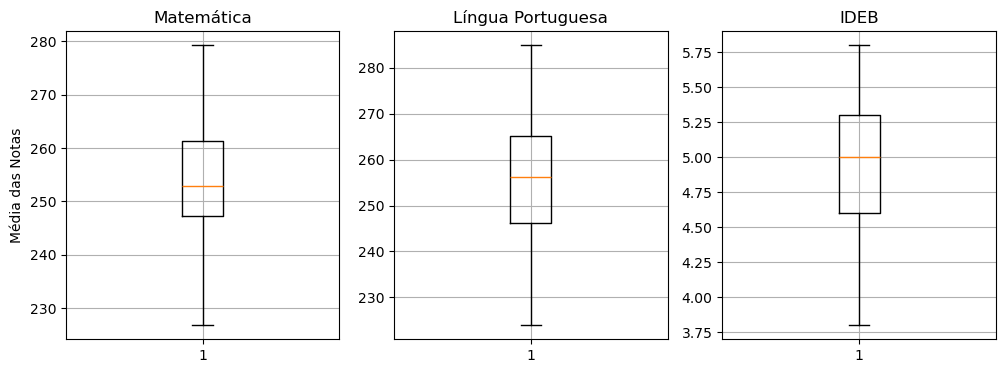

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

NotaMat = dados['Nota_SAEB_Mat'].dropna()
NotaPt = dados['Nota_SAEB_LP'].dropna()
NotaIDEB = dados['IDEB'].dropna()

# Boxplot para o 6º ano
axs[0].boxplot(NotaMat)
axs[0].set_ylabel('Média das Notas')
axs[0].set_title('Matemática')
axs[0].grid(True)

# Boxplot para o 7º ano
axs[1].boxplot(NotaPt)
axs[1].set_title('Língua Portuguesa')
axs[1].grid(True)

# Boxplot para o 8º ano
axs[2].boxplot(NotaIDEB)
axs[2].set_title('IDEB')
axs[2].grid(True)

plt.show()

In [57]:
# Pode-se notar a presença de outliers nos boxplots relacionados à aprovação. Nos anos em que não há reprovações, a existência de outliers 
# pode indicar abandono escolar. Ao examinar os gráficos e boxplots das médias de notas em matemática, língua portuguesa e do IDEB, observa-se 
# que eles não apresentam outliers e seguem um padrão mais regular. Isso reforça ainda mais a hipótese de que os outliers nos gráficos de 
# rendimento se devem principalmente ao abandono escolar.

In [ ]:
#2. Calcule a covariância das seguintes variáveis (variância conjunta): aprovação média e indicador de notasimento, indicador de notasimento e 
# nota padronizada, nota padronizada e IDEB, indicador de notasimento e IDEB.

In [59]:
dados.columns

Index(['UF', 'Municipio', 'Cod_Escola', 'Rede', 'Ap_Media', 'Rend_6', 'Rend_7',
       'Rend_8', 'Rend_9', 'Indicador_de_rendimento', 'Nota_SAEB_Mat',
       'Nota_SAEB_LP', 'Nota_Padronizada', 'IDEB'],
      dtype='object')

In [62]:
# Calcular a covariância entre aprovação média e indicador de rendimento
cov1 = dados[['Ap_Media', 'Indicador_de_rendimento']].cov().iloc[0, 1]

# Calcular a covariância entre indicador de rendimento e nota padronizada
cov2 = dados[['Indicador_de_rendimento', 'Nota_Padronizada']].cov().iloc[0, 1]

# Calcular a covariância entre nota padronizada e IDEB
cov3 = dados[['Nota_Padronizada', 'IDEB']].cov().iloc[0, 1]

# Calcular a covariância entre indicador de rendimento e IDEB
cov4 = dados[['Indicador_de_rendimento', 'IDEB']].cov().iloc[0, 1]

# Exibir os resultados
print("Resultado da covariância:")
print(f"- Aprovação Média e Indicador de Rendimento: {cov1:.4f}")
print(f"- Indicador de Rendimento e Nota Padronizada: {cov2:.4f}")
print(f"- Nota Padronizada e IDEB: {cov3:.4f}")
print(f"- Indicador de Rendimento e IDEB: {cov4:.4f}")


Resultado da covariância:
- Aprovação Média e Indicador de Rendimento: 0.1356
- Indicador de Rendimento e Nota Padronizada: 0.0036
- Nota Padronizada e IDEB: 0.1447
- Indicador de Rendimento e IDEB: 0.0110


In [ ]:
#3. Faça gráficos de dispersão das informações acima. É possível identificar algum padrão?

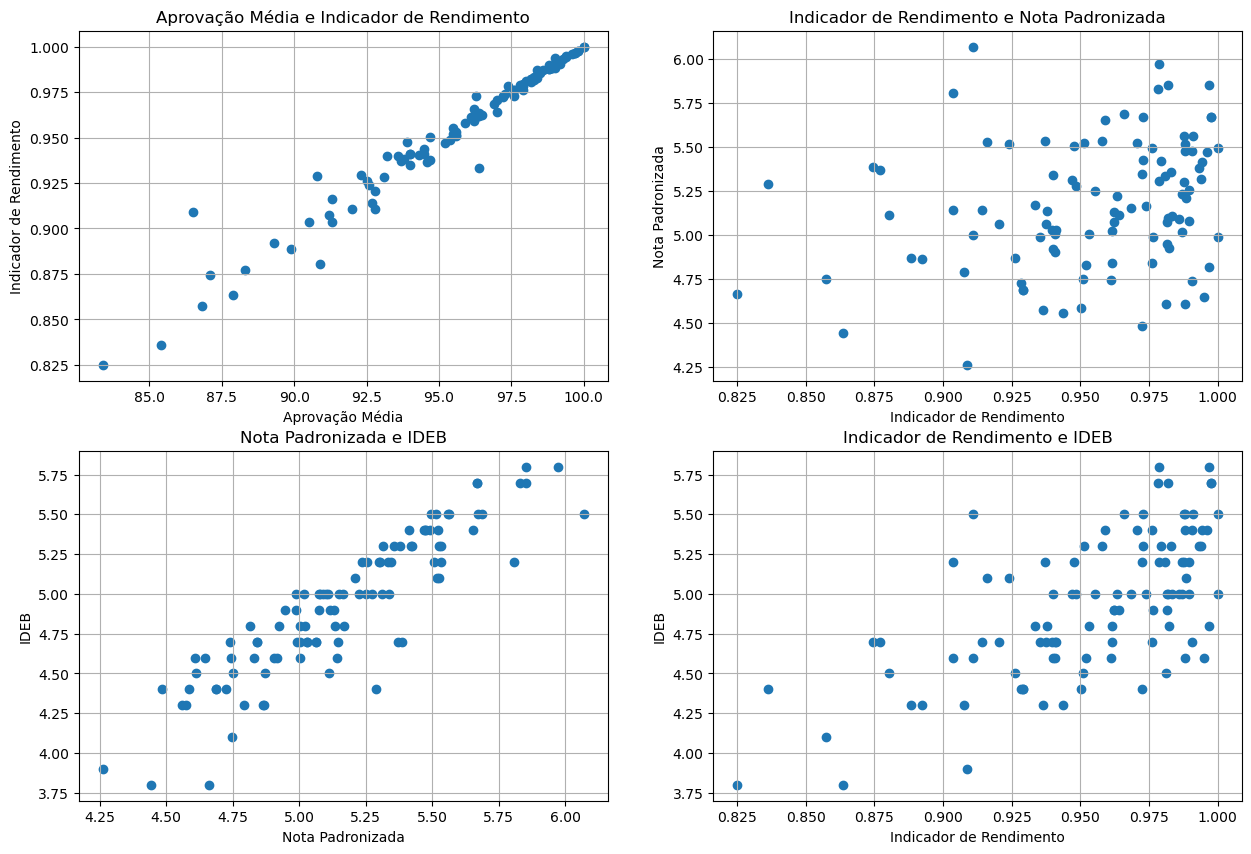

Nota-se que as covariâncias exibem um padrão crescente. Embora haja sinais de crescimento em todos os gráficos, esse aumento é muito mais evidente nos gráficos 1 e 3.


In [66]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Aprovação média e indicador de rendimento
axs[0, 0].scatter(dados['Ap_Media'], dados['Indicador_de_rendimento'])
axs[0, 0].set_xlabel('Aprovação Média')
axs[0, 0].set_ylabel('Indicador de Rendimento')
axs[0, 0].set_title('Aprovação Média e Indicador de Rendimento')
axs[0, 0].grid(True)

# Indicador de rendimento e nota padronizada
axs[0, 1].scatter(dados['Indicador_de_rendimento'], dados['Nota_Padronizada'])
axs[0, 1].set_xlabel('Indicador de Rendimento')
axs[0, 1].set_ylabel('Nota Padronizada')
axs[0, 1].set_title('Indicador de Rendimento e Nota Padronizada')
axs[0, 1].grid(True)

# Nota padronizada e IDEB
axs[1, 0].scatter(dados['Nota_Padronizada'], dados['IDEB'])
axs[1, 0].set_xlabel('Nota Padronizada')
axs[1, 0].set_ylabel('IDEB')
axs[1, 0].set_title('Nota Padronizada e IDEB')
axs[1, 0].grid(True)

# Indicador de rendimento e IDEB
axs[1, 1].scatter(dados['Indicador_de_rendimento'], dados['IDEB'])
axs[1, 1].set_xlabel('Indicador de Rendimento')
axs[1, 1].set_ylabel('IDEB')
axs[1, 1].set_title('Indicador de Rendimento e IDEB')
axs[1, 1].grid(True)

plt.show()
print("Nota-se que as covariâncias exibem um padrão crescente. Embora haja sinais de crescimento em todos os gráficos, esse aumento é muito mais evidente nos gráficos 1 e 3.")

In [ ]:
# 4. Calcule a correlação dos itens pedidos em (2). Explique os resultados obtidos, partindo da definição de correlação.

In [68]:
# Calcular a correlação entre aprovação média e indicador de rendimento
corr1 = dados[['Ap_Media', 'Indicador_de_rendimento']].corr().iloc[0, 1]

# Calcular a correlação entre indicador de rendimento e nota padronizada
corr2 = dados[['Indicador_de_rendimento', 'Nota_Padronizada']].corr().iloc[0, 1]

# Calcular a correlação entre nota padronizada e IDEB
corr3 = dados[['Nota_Padronizada', 'IDEB']].corr().iloc[0, 1]

# Calcular a correlação entre indicador de rendimento e IDEB
corr4 = dados[['Indicador_de_rendimento', 'IDEB']].corr().iloc[0, 1]

# Exibir os resultados
print("Resultado da correlação:")
print(f"- Aprovação Média e Indicador de Rendimento: {corr1:.4f}")
print(f"- Indicador de Rendimento e Nota Padronizada: {corr2:.4f}")
print(f"- Nota Padronizada e IDEB: {corr3:.4f}")
print(f"- Indicador de Rendimento e IDEB: {corr4:.4f}")

Resultado da correlação:
- Aprovação Média e Indicador de Rendimento: 0.9787
- Indicador de Rendimento e Nota Padronizada: 0.2583
- Nota Padronizada e IDEB: 0.8956
- Indicador de Rendimento e IDEB: 0.6554


In [ ]:
# 1) Aprovação Média e Indicador de Rendimento: Apresentam uma correlação positiva.

# 2) Indicador de Rendimento e Nota Padronizada: Apresentam uma correlação positiva, embora baixa.

# 3) Nota Padronizada e IDEB: Apresentam uma correlação positiva.

# 4) Indicador de Rendimento e IDEB: Embora os pontos estejam muito dispersos, nota-se uma correlação positiva.

# Essa correlação positiva indica que os dados são diretamente proporcionais, ou seja, quando uma variável diminui, 
# a outra tende a diminuir também. No entanto, nos gráficos 2 e 4, isso não é tão evidente, sugerindo que uma variável 
# não depende tanto da outra.

In [ ]:
# 5. Calcule o índice chamado R quadrado para os itens calculados em (4). Qual o significado dos resultados obtidos?

In [71]:
# Calcular os coeficientes de determinação (R²)
r2_aprovacao_indicador = corr1**2
r2_indicador_nota = corr2**2
r2_nota_ideb = corr3**2
r2_indicador_ideb = corr4**2

# Exibir os resultados
print("Resultados dos coeficientes de determinação (R²):")
print(f"- Aprovação Média e Indicador de Rendimento: {r2_aprovacao_indicador:.2f}")
print(f"- Indicador de Rendimento e Nota Padronizada: {r2_indicador_nota:.2f}")
print(f"- Nota Padronizada e IDEB: {r2_nota_ideb:.2f}")
print(f"- Indicador de Rendimento e IDEB: {r2_indicador_ideb:.2f}")

Resultados dos coeficientes de determinação (R²):
- Aprovação Média e Indicador de Rendimento: 0.96
- Indicador de Rendimento e Nota Padronizada: 0.07
- Nota Padronizada e IDEB: 0.80
- Indicador de Rendimento e IDEB: 0.43


In [72]:
# 1) Revela uma associação muito robusta e um excelente ajuste ao modelo linear.
# 2) Indica uma ligação fraca, mostrando que a nota padronizada não é um bom indicador do rendimento.
# 3) Demonstra uma associação sólida e um ajuste adequado ao modelo linear.
# 4) Sinaliza uma ligação moderada, mostrando que o IDEB é um preditor razoável do rendimento.

In [ ]:
# 6. Há algum relação entre os resultados obtidos nos itens (2) e (4).
# R: 
# 1) A covariância descreve a relação linear entre duas variáveis, destacando como elas mudam em conjunto.
# 2) Enquanto isso, a correlação é uma medida padronizada da covariância, representada em uma escala de -1 a 1. Ela não apenas indica a 
# direção da conexão linear entre as variáveis, mas também a intensidade dessa associação.

In [ ]:
# 7. O que é possível inferir de todas as análises realizadas nos itens de (1) a (4).
# R: A relação entre o desempenho dos alunos e a taxa de aprovação parece ser forte, enquanto a influência da média das notas das turmas parece 
# ser limitada. Isso indica que outros fatores podem estar influenciando as taxas de aprovação, que não estão diretamente ligados ao 
# desempenho dos alunos.